# Explore here

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

try:
    auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    spotify = spotipy.Spotify(auth_manager=auth_manager)
    result = spotify.artist_top_tracks("3o2dn2O0FCVsWDFSh8qxgG")
    top10 = result['tracks']

    data = {'name':[],'duration':[],'popularity':[]}
    for track in top10:
        data['name'].append(track['name'])
        data['duration'].append(track['duration_ms'])
        data['popularity'].append(track['popularity'])   
except Exception as e:
    print("Ocurrió un error:", e)

df = pd.DataFrame(data)
df_sorted = df.sort_values(['popularity'])
df_sorted.head(3)

,name,duration,popularity
7,The Attack of the Dead Men,235720,63
5,Soldier of Heaven,218000,63
9,The Red Baron,202333,63


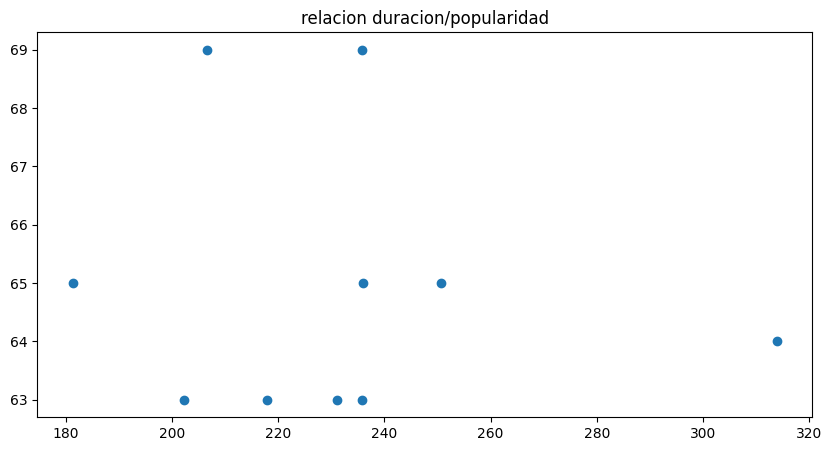

In [3]:
serie = pd.Series(data['duration'])
duracion_s = serie / 1000

plt.figure(figsize=(10,5))
plt.title('relacion duracion/popularidad')
plt.scatter(duracion_s,data['popularity'])
plt.show()

Viendo el intervalo de duracion de las canciones (de 180s a 315s), considerando que solo hay 2 canciones con una popularidad ligeramente superior, y que el resto se mueve en un rango de popularidad de 63-65 a lo largo de todo el espectro de duracion, podemos concluir que no existe una relacion entre la duracion y la popularidad de las canciones.